In [53]:
file_path = "examples/fdia/epsilon_0.025/class_0/results/auto/summary_verify_fdia_ffnn_pytorch 100 200.npz"
file_path_cls_1 = "examples/fdia/epsilon_0.025/class_1/results/auto/summary_verify_fdia_ffnn_pytorch 100 200.npz"

In [54]:
import numpy as np

class_0_ret = np.load(file_path)
class_1_ret = np.load(file_path_cls_1)

In [55]:
print(class_0_ret['results'])
print(class_0_ret['times'])

[1 2 2 1 1 2 1 0 2 1 2 2 1 0 2 2 2 2 2 2]
[4.23521056e+01 6.00071270e+01 6.00009895e+01 3.97921912e-03
 4.02708910e-03 6.00082786e+01 3.89501685e-03 1.69046228e-02
 6.00011779e+01 4.06794716e-03 6.00032627e+01 6.00042648e+01
 7.64199300e-03 1.47777521e-02 6.00095660e+01 6.00028204e+01
 6.00011883e+01 6.00023297e+01 6.00007862e+01 6.00031260e+01]


In [56]:
# Convert results and times to numpy arrays for summary calculations
results_array = class_0_ret['results']
times_array = class_0_ret['times']
N = len(results_array)  # Total number of samples

# Calculate summary statistics
totalTime = times_array.sum()
avgTime = totalTime / N if N > 0 else 0

robust_samples = np.count_nonzero(results_array == 1)
not_robust_samples = np.count_nonzero(results_array == 0)
unknown_samples = np.count_nonzero(results_array == 2)

# Print results to the screen
print("======= ROBUSTNESS RESULTS ==========")
print(f"Number of robust samples = {robust_samples}, equivalent to {100 * robust_samples / N:.2f}% of the samples.")
print(f"Number of not robust samples = {not_robust_samples}, equivalent to {100 * not_robust_samples / N:.2f}% of the samples.")
print(f"Number of unknown samples = {unknown_samples}, equivalent to {100 * unknown_samples / N:.2f}% of the samples.")
print(f"It took a total of {totalTime:.2f} seconds to compute the verification results, an average of {avgTime:.2f} seconds per image")

======= ROBUSTNESS RESULTS ==========
Number of robust samples = 6, equivalent to 30.00% of the samples.
Number of not robust samples = 2, equivalent to 10.00% of the samples.
Number of unknown samples = 12, equivalent to 60.00% of the samples.
It took a total of 762.45 seconds to compute the verification results, an average of 38.12 seconds per image


In [57]:
# Convert results and times to numpy arrays for summary calculations
results_array = class_1_ret['results']
times_array = class_1_ret['times']
N = len(results_array)  # Total number of samples

# Calculate summary statistics
totalTime_2 = times_array.sum()
avgTime_2 = totalTime_2 / N if N > 0 else 0

robust_samples_2 = np.count_nonzero(results_array == 1)
not_robust_samples_2 = np.count_nonzero(results_array == 0)
unknown_samples_2 = np.count_nonzero(results_array == 2)

# Print results to the screen
print("======= ROBUSTNESS RESULTS ==========")
print(f"Number of robust samples = {robust_samples_2}, equivalent to {100 * robust_samples_2 / N:.2f}% of the samples.")
print(f"Number of not robust samples = {not_robust_samples_2}, equivalent to {100 * not_robust_samples_2 / N:.2f}% of the samples.")
print(f"Number of unknown samples = {unknown_samples_2}, equivalent to {100 * unknown_samples_2 / N:.2f}% of the samples.")
print(f"It took a total of {totalTime_2:.2f} seconds to compute the verification results, an average of {avgTime_2:.2f} seconds per image")

======= ROBUSTNESS RESULTS ==========
Number of robust samples = 1, equivalent to 5.00% of the samples.
Number of not robust samples = 9, equivalent to 45.00% of the samples.
Number of unknown samples = 10, equivalent to 50.00% of the samples.
It took a total of 711.72 seconds to compute the verification results, an average of 35.59 seconds per image


In [58]:
print(100.0*(robust_samples+robust_samples_2)/2/N)
print(100.0*(not_robust_samples+not_robust_samples_2)/2/N)
print((avgTime+avgTime_2)/2)

17.5
27.5
36.854287338838915


In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# data = np.from_csv()
data = pd.read_csv("verification_result.csv")
nnv_result = data.loc[data['tool'] == 'nnv']
nnenum_result = data.loc[data['tool'] == 'nnenum']
# Plot the average time
# plt.figure(figsize=(10, 6))
# plt.plot(data['epsilon'][0:9], data['avg_time'][0:9], color='blue', linestyle='-', label='nnv')
# plt.plot(data['epsilon'][9:], data['avg_time'][9:], color='orange', linestyle='--', label='nnenum')
# plt.xlabel('Epsilon')
# plt.ylabel('Average Time (s)')
# plt.title('Average Time')
# plt.legend()
# plt.grid()
# plt.show()

In [60]:
nnv_result

,model,tool,epsilon,Robust,Non-robust,AVG time (s)
0,M1 (50/100/50),nnv,0.005,54.65,0.0,0.45
1,M1 (50/100/50),nnv,0.010,43.29,0.0,0.66
2,M1 (50/100/50),nnv,0.025,12.55,0.0,1.42
3,M2 (100/200/100),nnv,0.005,41.23,0.0,1.91
4,M2 (100/200/100),nnv,0.010,26.52,0.0,2.79
5,M2 (100/200/100),nnv,0.025,7.25,0.0,5.33
6,M3 (200/400/200),nnv,0.005,12.45,0.0,18.14
7,M3 (200/400/200),nnv,0.010,7.36,0.0,23.70
8,M3 (200/400/200),nnv,0.025,1.63,0.0,76.82


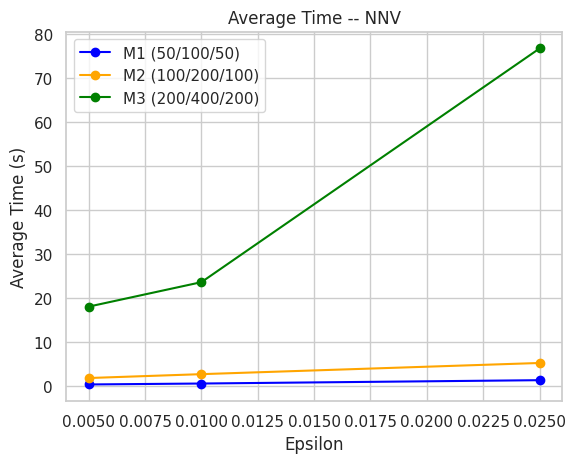

In [61]:
nnv_result
# Plot the average time
# Create a unique color for each model
model_colors = {'M1 (50/100/50)': 'blue', 'M2 (100/200/100)': 'orange', 'M3 (200/400/200)': 'green'}

# Plot the average time for each model
for model in nnv_result['model'].unique():
    model_data = nnv_result[nnv_result['model'] == model]
    plt.plot(model_data['epsilon'], model_data['AVG time (s)'], color=model_colors[model], marker='o', linestyle='-', label=model)

plt.xlabel('Epsilon')
plt.ylabel('Average Time (s)')
plt.title('Average Time -- NNV')
plt.legend()
plt.grid(linewidth=1)
plt.show()

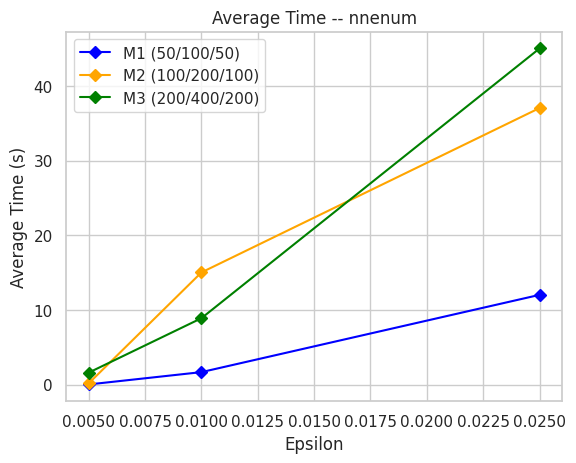

In [62]:
# nnv_result = nnenum_result
# Plot the average time
# Create a unique color for each model
model_colors = {'M1 (50/100/50)': 'blue', 'M2 (100/200/100)': 'orange', 'M3 (200/400/200)': 'green'}

# Plot the average time for each model
for model in nnenum_result['model'].unique():
    model_data = nnenum_result[nnenum_result['model'] == model]
    plt.plot(model_data['epsilon'], model_data['AVG time (s)'], color=model_colors[model], marker='D', linestyle='-', label=model)

plt.xlabel('Epsilon')
plt.ylabel('Average Time (s)')
plt.title('Average Time -- nnenum')
plt.legend()
plt.grid(linewidth=1)
plt.show()

In [63]:
nnenum_result

,model,tool,epsilon,Robust,Non-robust,AVG time (s)
9,M1 (50/100/50),nnenum,0.005,92.5,7.5,0.02
10,M1 (50/100/50),nnenum,0.010,82.5,17.5,1.67
11,M1 (50/100/50),nnenum,0.025,17.5,82.5,12.02
12,M2 (100/200/100),nnenum,0.005,90.0,10.0,0.16
13,M2 (100/200/100),nnenum,0.010,65.0,35.0,15.02
14,M2 (100/200/100),nnenum,0.025,10.0,90.0,37.04
15,M3 (200/400/200),nnenum,0.005,95.0,5.0,1.60
16,M3 (200/400/200),nnenum,0.010,67.5,22.5,8.89
17,M3 (200/400/200),nnenum,0.025,10.0,90.0,45.02


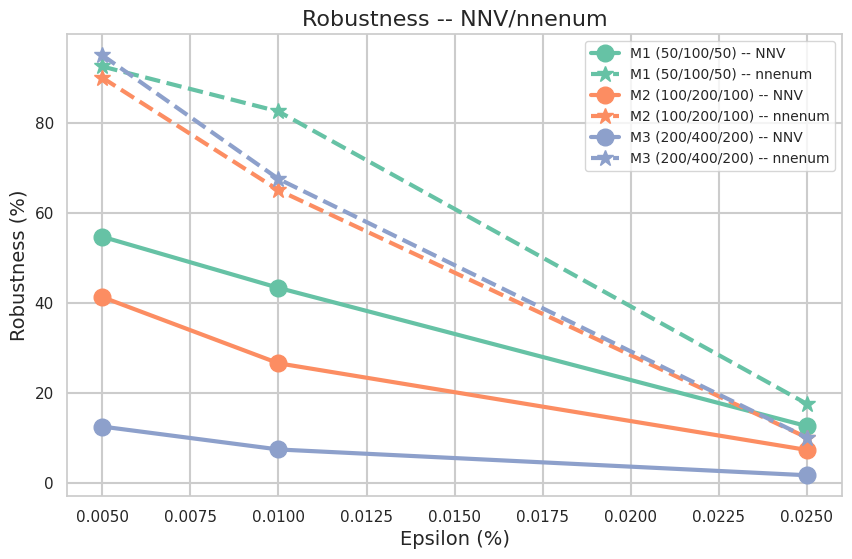

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the Seaborn theme
sns.set_theme(style="whitegrid", palette="Set2")

# Assuming you have the data in DataFrames called 'nnv_result' and 'nnenum_result'
plt.figure(figsize=(10, 6))

for model in nnv_result['model'].unique():
    model_data = nnv_result[nnv_result['model'] == model]
    model_data_2 = nnenum_result[nnenum_result['model'] == model]
    
    # Use Seaborn's "colorblind" palette to get more distinguishable colors
    color = sns.color_palette("Set2")[list(nnv_result['model'].unique()).index(model)]
    
    plt.plot(model_data['epsilon'], model_data['Robust'], color=color, marker='o', markersize=12, linewidth=3, linestyle='-', label=f"{model} -- NNV")
    plt.plot(model_data_2['epsilon'], model_data_2['Robust'], color=color, marker='*', markersize=12, linewidth=3, linestyle='--', label=f"{model} -- nnenum")

plt.xlabel('Epsilon (%)', fontsize=14)
plt.ylabel('Robustness (%)', fontsize=14)
plt.title('Robustness -- NNV/nnenum', fontsize=16)
plt.legend(fontsize=10)
plt.grid(linewidth=1.5)
plt.show()

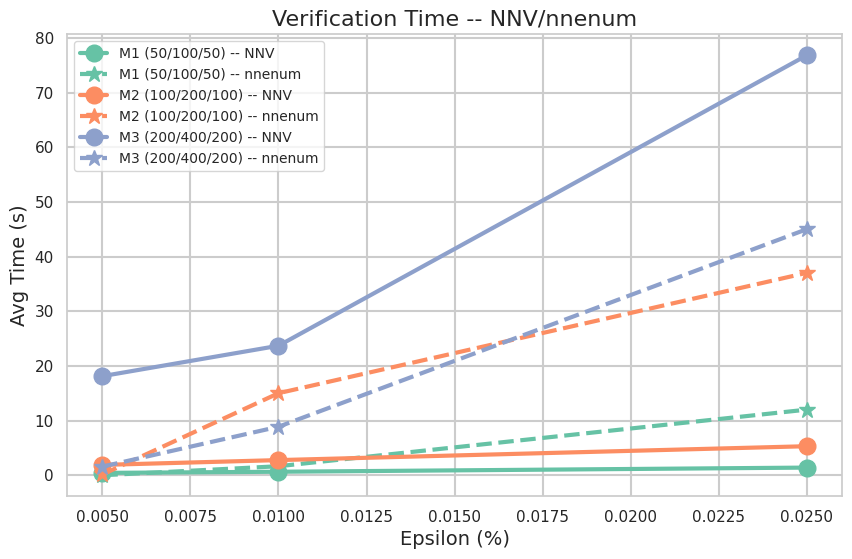

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the Seaborn theme
sns.set_theme(style="whitegrid", palette="Set2")

# Assuming you have the data in DataFrames called 'nnv_result' and 'nnenum_result'
plt.figure(figsize=(10, 6))

for model in nnv_result['model'].unique():
    model_data = nnv_result[nnv_result['model'] == model]
    model_data_2 = nnenum_result[nnenum_result['model'] == model]
    
    # Use Seaborn's "colorblind" palette to get more distinguishable colors
    color = sns.color_palette("Set2")[list(nnv_result['model'].unique()).index(model)]
    
    plt.plot(model_data['epsilon'], model_data['AVG time (s)'], color=color, marker='o', markersize=12, linewidth=3, linestyle='-', label=f"{model} -- NNV")
    plt.plot(model_data_2['epsilon'], model_data_2['AVG time (s)'], color=color, marker='*', markersize=12, linewidth=3, linestyle='--', label=f"{model} -- nnenum")

plt.xlabel('Epsilon (%)', fontsize=14)
plt.ylabel('Avg Time (s)', fontsize=14)
plt.title('Verification Time -- NNV/nnenum', fontsize=16)
plt.legend(fontsize=10)
plt.grid(linewidth=1.5)
plt.show()